<a href="https://colab.research.google.com/github/RudraxDave/SVM-Dual-Formulation-Kernel-Comparison/blob/main/SVM_Dual_Formulation_Kernel_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

μ:  [0.22222222 0.22222222 0.44444444]
λ:  [0.22222222 0.22222222 0.44444444] 
 

Optimal Weight Value are W* [0.66666667 0.66666667]
Weight Values are W0 -1.0 
 



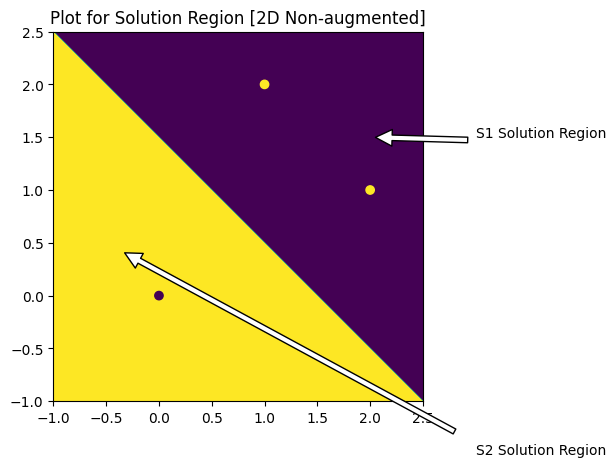

μ:  [2. 2. 4.]
λ:  [2. 2. 4.] 
 

Optimal Weight Value are W* [2. 2.]
Weight Values are W0 -5.000000000000002 
 



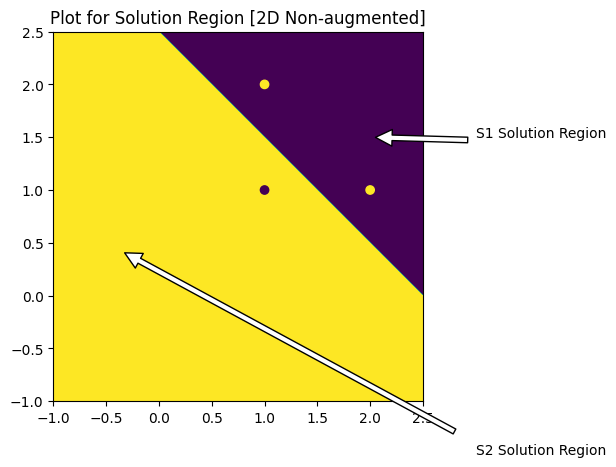

μ:  [ 2.22222222 -0.44444444  1.77777778]
λ:  [2.22222222 0.         1.77777778] 
 

Optimal Weight Value are W* [2.22222222 1.77777778]
Weight Values are W0 -4.777777777777786 
 



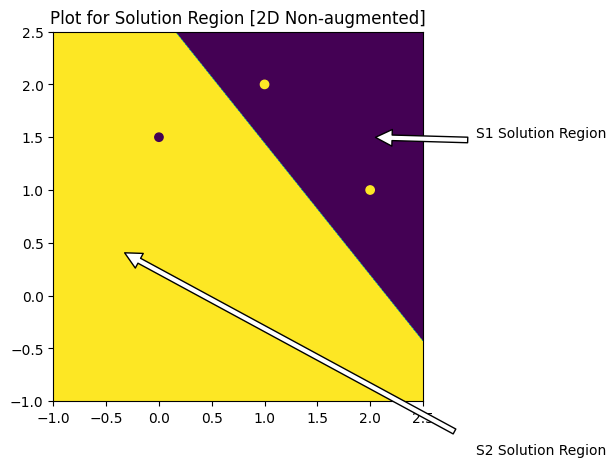

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class SVMdual():
    def __init__(self, u3):
        # Initialize with two fixed data points and one variable point
        self.u1 = np.array([1, 2])
        self.u2 = np.array([2, 1])
        self.u3 = np.array(u3)  # Variable data point
        self.z1 = 1             # Labels for u1 and u2 (positive class)
        self.z2 = 1
        self.z3 = -1            # Label for u3 (negative class)

    def generalizing(self):
        # Return the feature vectors and corresponding labels as numpy arrays
        uval = np.array([self.u1, self.u2, self.u3])
        zval = np.array([self.z1, self.z2, self.z3])
        return uval, zval

    def solvematrix(self):
        # Construct the matrix A and vector b for the quadratic programming problem
        A = np.array([
            [(self.z1**2) * np.dot(self.u1.T, self.u1), self.z1*self.z2*np.dot(self.u1.T, self.u2), self.z1*self.z3*np.dot(self.u1.T, self.u3), -self.z1],
            [self.z1*self.z2*np.dot(self.u1.T, self.u2), (self.z2**2)*np.dot(self.u2.T, self.u2), self.z2*self.z3*np.dot(self.u2.T, self.u3), -self.z2],
            [self.z1*self.z3*np.dot(self.u1.T, self.u3), self.z2*self.z3*np.dot(self.u2.T, self.u3), (self.z3**2)*np.dot(self.u3.T, self.u3), -self.z3],
            [self.z1, self.z2, self.z3, 0]
            ])
        b = np.array([1, 1, 1, 0])  # Vector b for the quadratic programming problem
        return A, b

    def solverho(self, A, b):
        # Solve the system of linear equations to find the Lagrange multipliers (lambda) and offset (mu)
        rho = np.dot(np.linalg.inv(A), b)
        lambdaval = rho[:3]
        mu = rho[-1]
        print(f"μ: ", lambdaval)
        return lambdaval, mu

    def lambdacondition(self, lambdaval):
        # Ensure all lambda values are non-negative (dual feasibility condition)
        for i in range(len(lambdaval)):
            if lambdaval[i] < 0:
                lambdaval[i] = 0
        print(f"λ: ", lambdaval, "\n \n")
        return lambdaval

    def KKTcondition(self, lambdaval, zval):
        # Verify the KKT conditions: λi >= 0 and sum(λi * zi) = 0
        for i in lambdaval:
            assert i >= 0
        assert round(np.dot(lambdaval, zval)) == 0  # Ensure that sum of λi * zi = 0

    def opt_wght(self, uval, lambdaval, zval):
        # Compute the optimal weight vector w* using the dual solution
        add_w = []
        for i in range(len(uval)):
            add_w.append(lambdaval[i] * zval[i] * uval[i])
        opt_w = np.array(sum(add_w))

        print(f"Optimal Weight Value are W*", opt_w)

        # Calculate the optimal offset w0
        w0 = (1 / zval[0]) - (np.dot(opt_w.T, uval[0]))
        print(f"Weight Values are W0", w0, "\n \n")
        return opt_w, w0

    def KKTcondition2(self, uval, zval, lambdaval, opt_w, w0):
        # Check the second set of KKT conditions: zi [wT ui + w0] - 1 >= 0
        for i in range(len(uval)):
            assert round((zval[i] * (np.dot(opt_w.T, uval[i]) + w0) - 1)) >= 0

        # Uncomment the following lines to check the complementary slackness condition:
        # λi* [zi [wT ui + w0] - 1] = 0
        # for i in range(len(uval)):
        #     assert round(lambdaval[i] * (zval[i] * (np.dot(opt_w.T, uval[i]) + w0) - 1)) == 0

    def plot(self, opt_w, w0, uval, zval):
        # Generate a 2D plot showing the decision boundary and solution regions
        inc = 0.005
        (x, y) = np.meshgrid(np.arange(-1, 2.5, inc), np.arange(-1, 2.5, inc))
        xy = np.hstack((x.reshape(x.shape[0]*x.shape[1], 1, order='F'), y.reshape(y.shape[0]*y.shape[1], 1, order='F')))

        # Compute the decision function values
        x_y = np.dot(opt_w, xy.T) + w0
        for i in range(len(x_y)):
            if x_y[i] >= 0:
                x_y[i] = 0
            else:
                x_y[i] = 1

        # Reshape the decision function values to match the grid shape
        img = x_y.reshape(x.shape, order='F')
        plt.imshow(img, extent=[-1, 2.5, -1, 2.5], origin='lower')

        # Annotate the plot with labels for solution regions
        plt.title('Plot for Solution Region [2D Non-augmented]')
        plt.annotate('S1 Solution Region', xy=(2, 1.5), xytext=(3, 1.5),
                    arrowprops=dict(facecolor='white', shrink=0.05),
                    )
        plt.annotate('S2 Solution Region', xy=(-0.5, 0.5), xytext=(3, -1.5),
                    arrowprops=dict(facecolor='white', shrink=0.05),
                    )
        plt.scatter(uval[:, 0], uval[:, 1], c=zval)  # Plot the data points
        plt.show()

def iteration(u3):
    # Run the SVM dual formulation for a given third data point
    chk1 = SVMdual(u3)
    uval, zval = chk1.generalizing()
    A, b = chk1.solvematrix()

    lambdaval, mu = chk1.solverho(A, b)
    lambdaval = chk1.lambdacondition(lambdaval)
    chk1.KKTcondition(lambdaval, zval)

    opt_w, w0 = chk1.opt_wght(uval, lambdaval, zval)
    chk1.KKTcondition2(uval, zval, lambdaval, opt_w, w0)

    chk1.plot(opt_w, w0, uval, zval)

# Testing the SVM dual formulation with different third data points
iteration([0, 0])  # First dataset, simple case
iteration([1, 1])  # Second dataset, changes the margin slightly
iteration([0, 1.5])  # Third dataset, significant change in decision boundary


#Additional Experiments
##1. Testing Different Data Points
Test the model with different values for the third data point (u3) to observe how the decision boundary changes. You can experiment with points like [2, 2], [3, 0], or even negative coordinates like [-1, -2].

##2. Adding Noise to Data
You can introduce some noise to the data points to simulate real-world scenarios. For example, add small random values to u1, u2, and u3 and see how the SVM model adapts.

μ:  [0.19543251 0.18468915 0.38012166]
λ:  [0.19543251 0.18468915 0.38012166] 
 

Optimal Weight Value are W* [0.61654007 0.61654007]
Weight Values are W0 -0.8496202160181467 
 



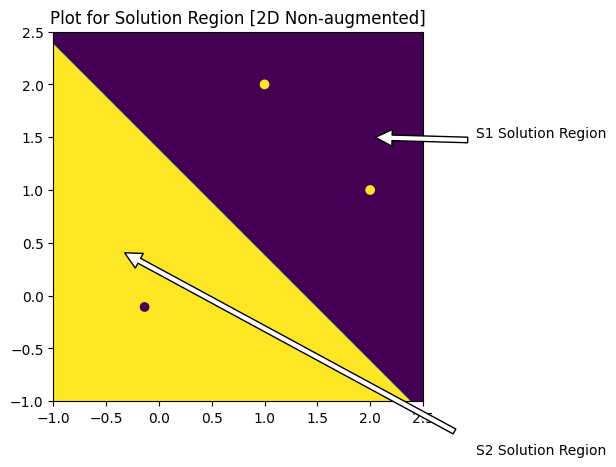

In [2]:
# Adding small noise to u1, u2, and u3
noise_level = 0.1
iteration([0 + np.random.normal(0, noise_level), 0 + np.random.normal(0, noise_level)])


μ:  [0.22222222 0.22222222 0.44444444]
λ:  [0.22222222 0.22222222 0.44444444] 
 

Optimal Weight Values are W*: [0.66666667 0.66666667]
Weight Value is W0: -1.0 
 



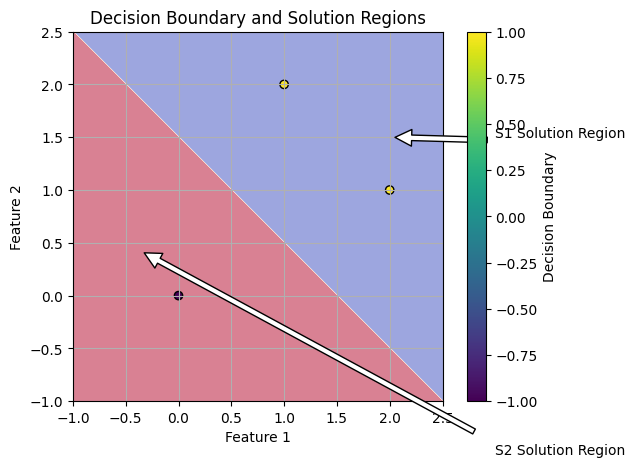

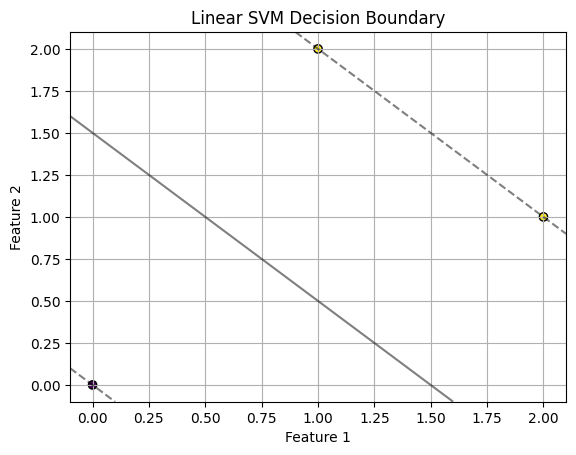

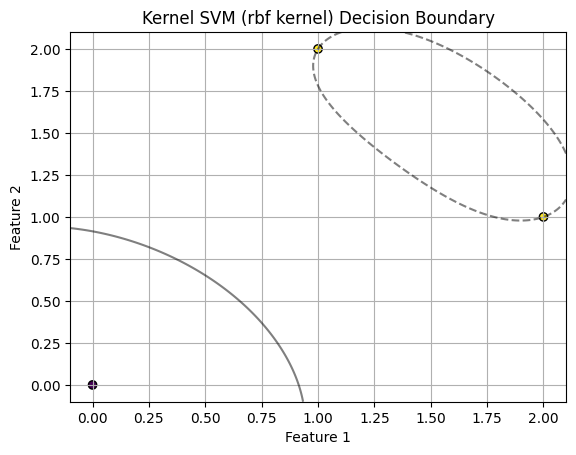

μ:  [2. 2. 4.]
λ:  [2. 2. 4.] 
 

Optimal Weight Values are W*: [2. 2.]
Weight Value is W0: -5.000000000000002 
 



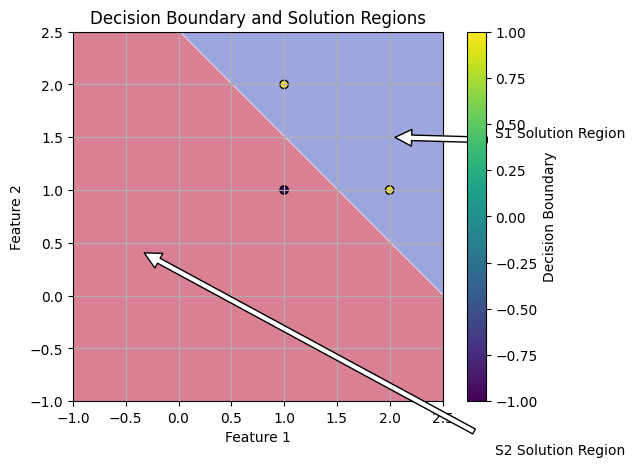

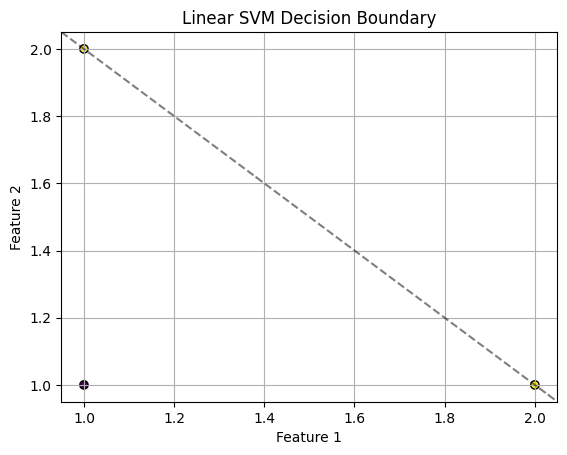

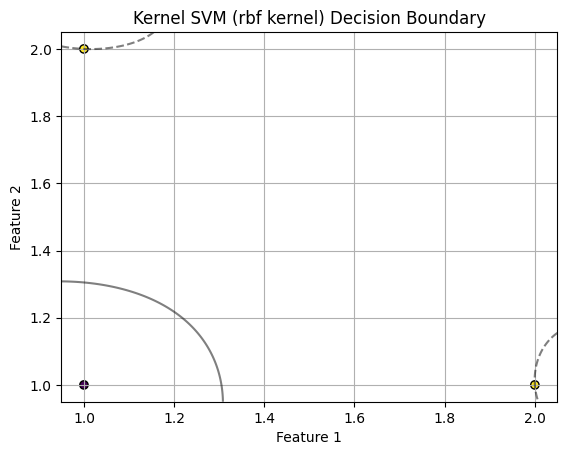

μ:  [ 2.22222222 -0.44444444  1.77777778]
λ:  [2.22222222 0.         1.77777778] 
 

Optimal Weight Values are W*: [2.22222222 1.77777778]
Weight Value is W0: -4.777777777777786 
 



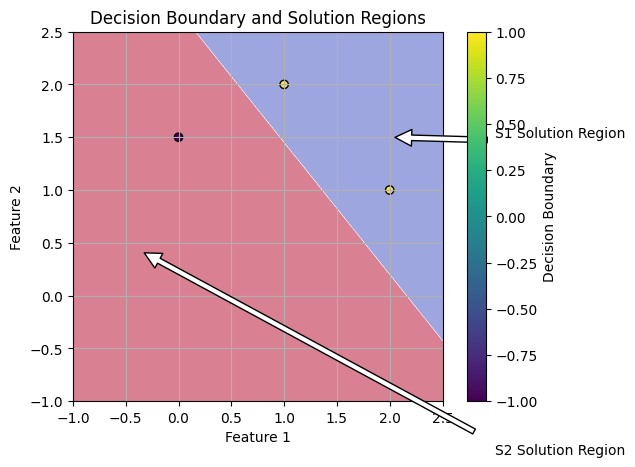

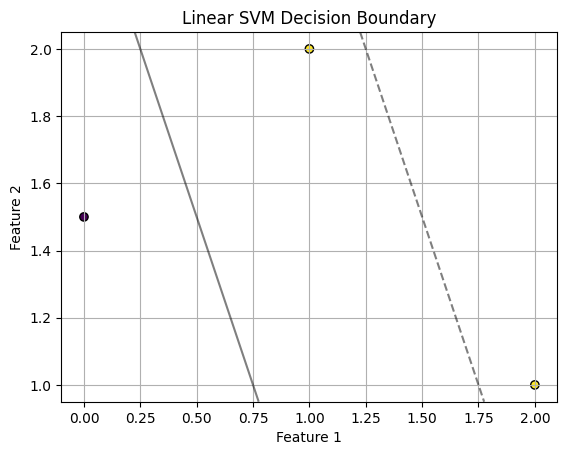

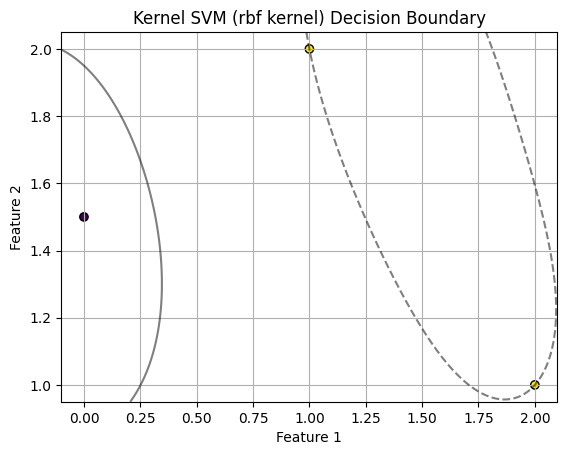

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

class SVMdual():
    def __init__(self, u3):
        # Initialize with two fixed data points and one variable point
        self.u1 = np.array([1, 2])
        self.u2 = np.array([2, 1])
        self.u3 = np.array(u3)  # Variable data point
        self.z1 = 1             # Labels for u1 and u2 (positive class)
        self.z2 = 1
        self.z3 = -1            # Label for u3 (negative class)

    def generalizing(self):
        # Return the feature vectors and corresponding labels as numpy arrays
        uval = np.array([self.u1, self.u2, self.u3])
        zval = np.array([self.z1, self.z2, self.z3])
        return uval, zval

    def solvematrix(self):
        # Construct the matrix A and vector b for the quadratic programming problem
        A = np.array([
            [(self.z1**2) * np.dot(self.u1.T, self.u1), self.z1*self.z2*np.dot(self.u1.T, self.u2), self.z1*self.z3*np.dot(self.u1.T, self.u3), -self.z1],
            [self.z1*self.z2*np.dot(self.u1.T, self.u2), (self.z2**2)*np.dot(self.u2.T, self.u2), self.z2*self.z3*np.dot(self.u2.T, self.u3), -self.z2],
            [self.z1*self.z3*np.dot(self.u1.T, self.u3), self.z2*self.z3*np.dot(self.u2.T, self.u3), (self.z3**2)*np.dot(self.u3.T, self.u3), -self.z3],
            [self.z1, self.z2, self.z3, 0]
            ])
        b = np.array([1, 1, 1, 0])  # Vector b for the quadratic programming problem
        return A, b

    def solverho(self, A, b):
        # Solve the system of linear equations to find the Lagrange multipliers (lambda) and offset (mu)
        rho = np.dot(np.linalg.inv(A), b)
        lambdaval = rho[:3]
        mu = rho[-1]
        print(f"μ: ", lambdaval)
        return lambdaval, mu

    def lambdacondition(self, lambdaval):
        # Ensure all lambda values are non-negative (dual feasibility condition)
        lambdaval = np.clip(lambdaval, 0, None)
        print(f"λ: ", lambdaval, "\n \n")
        return lambdaval

    def KKTcondition(self, lambdaval, zval):
        # Verify the KKT conditions: λi >= 0 and sum(λi * zi) = 0
        assert all(i >= 0 for i in lambdaval)
        assert round(np.dot(lambdaval, zval)) == 0  # Ensure that sum of λi * zi = 0

    def opt_wght(self, uval, lambdaval, zval):
        # Compute the optimal weight vector w* using the dual solution
        opt_w = np.sum([lambdaval[i] * zval[i] * uval[i] for i in range(len(uval))], axis=0)

        print(f"Optimal Weight Values are W*:", opt_w)

        # Calculate the optimal offset w0
        w0 = (1 / zval[0]) - (np.dot(opt_w.T, uval[0]))
        print(f"Weight Value is W0:", w0, "\n \n")
        return opt_w, w0

    def KKTcondition2(self, uval, zval, lambdaval, opt_w, w0):
        # Check the second set of KKT conditions: zi [wT ui + w0] - 1 >= 0
        assert all(round(zval[i] * (np.dot(opt_w.T, uval[i]) + w0) - 1) >= 0 for i in range(len(uval)))

        # Uncomment the following lines to check the complementary slackness condition:
        # λi* [zi [wT ui + w0] - 1] = 0
        # assert all(round(lambdaval[i] * (zval[i] * (np.dot(opt_w.T, uval[i]) + w0) - 1)) == 0 for i in range(len(uval)))

    def plot(self, opt_w, w0, uval, zval):
        # Generate a 2D plot showing the decision boundary and solution regions
        inc = 0.005
        (x, y) = np.meshgrid(np.arange(-1, 2.5, inc), np.arange(-1, 2.5, inc))
        xy = np.hstack((x.reshape(x.shape[0]*x.shape[1], 1, order='F'), y.reshape(y.shape[0]*y.shape[1], 1, order='F')))

        # Compute the decision function values
        x_y = np.dot(opt_w, xy.T) + w0
        img = np.where(x_y >= 0, 0, 1).reshape(x.shape, order='F')

        plt.imshow(img, extent=[-1, 2.5, -1, 2.5], origin='lower', cmap='coolwarm', alpha=0.5)
        plt.title('Decision Boundary and Solution Regions')
        plt.scatter(uval[:, 0], uval[:, 1], c=zval, edgecolors='k', marker='o')  # Plot the data points
        plt.annotate('S1 Solution Region', xy=(2, 1.5), xytext=(3, 1.5),
                    arrowprops=dict(facecolor='white', shrink=0.05),
                    )
        plt.annotate('S2 Solution Region', xy=(-0.5, 0.5), xytext=(3, -1.5),
                    arrowprops=dict(facecolor='white', shrink=0.05),
                    )
        plt.colorbar(label='Decision Boundary')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.grid(True)
        plt.savefig('decision_boundary.png')  # Save the plot as an image
        plt.show()

class LinearSVM():
    def __init__(self, uval, zval):
        self.uval = uval
        self.zval = zval

    def fit(self):
        # Fit a linear SVM model using Scikit-Learn
        self.model = svm.SVC(kernel='linear')
        self.model.fit(self.uval, self.zval)

    def plot(self):
        # Plot decision boundary for linear SVM
        plt.figure()
        plt.scatter(self.uval[:, 0], self.uval[:, 1], c=self.zval, edgecolors='k', marker='o')
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500), np.linspace(ylim[0], ylim[1], 500))
        Z = self.model.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
        plt.title('Linear SVM Decision Boundary')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.grid(True)
        plt.show()

class KernelSVM():
    def __init__(self, uval, zval, kernel='rbf'):
        self.uval = uval
        self.zval = zval
        self.kernel = kernel

    def fit(self):
        # Fit a kernel SVM model using Scikit-Learn
        self.model = svm.SVC(kernel=self.kernel)
        self.model.fit(self.uval, self.zval)

    def plot(self):
        # Plot decision boundary for kernel SVM
        plt.figure()
        plt.scatter(self.uval[:, 0], self.uval[:, 1], c=self.zval, edgecolors='k', marker='o')
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500), np.linspace(ylim[0], ylim[1], 500))
        Z = self.model.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
        plt.title(f'Kernel SVM ({self.kernel} kernel) Decision Boundary')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.grid(True)
        plt.show()

def iteration(u3):
    # Run the SVM dual formulation for a given third data point
    chk1 = SVMdual(u3)
    uval, zval = chk1.generalizing()
    A, b = chk1.solvematrix()

    lambdaval, mu = chk1.solverho(A, b)
    lambdaval = chk1.lambdacondition(lambdaval)
    chk1.KKTcondition(lambdaval, zval)

    opt_w, w0 = chk1.opt_wght(uval, lambdaval, zval)
    chk1.KKTcondition2(uval, zval, lambdaval, opt_w, w0)

    chk1.plot(opt_w, w0, uval, zval)

    # Test linear SVM model
    linear_svm = LinearSVM(uval, zval)
    linear_svm.fit()
    linear_svm.plot()

    # Test kernel SVM model (RBF kernel)
    kernel_svm = KernelSVM(uval, zval, kernel='rbf')
    kernel_svm.fit()
    kernel_svm.plot()

# Testing the SVM dual formulation with different third data points
iteration([0, 0])  # First dataset, simple case
iteration([1, 1])  # Second dataset, changes the margin slightly
iteration([0, 1.5])  # Third dataset, significant change in decision boundary


